## EDXPLORATORY DATA ANALYSIS ON THE TOP STREAMED SPOTIFY TRACKS 2023

The objective of this activity is to analyze and interpret streaming data from Spotify's most popular tracks in 2023 to identify trends and characteristics that contribute to track popularity.

### Preprocessing of Data Set

In [2]:
#import necessary libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

### OVERVIEW OF DATA SET

In [3]:
df_spoti = pd.read_csv('spotify-2023.csv', encoding = 'latin1')
df_spoti

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [3]:
#display number of rows and columns of the data set
print ("Number of rows: ", df_spoti.shape[0])
print ("Number of columns: ", df_spoti.shape[1])

Number of rows:  953
Number of columns:  24


In [120]:
#check initial dataset structure and data types
print ("Dataset shape: ", df_spoti.shape)
df_spoti.info()

Dataset shape:  (953, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key           

### data cleaning

In [121]:
#locate non-numeric value for "streams" column
df_spoti['streams'].iloc[574]

'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

In [122]:
#convert non-numeric value to numeric value
df_spoti['streams'] = pd.to_numeric(df_spoti['streams'], errors = 'coerce')

if pd.isnull(df_spoti['streams'].iloc[574]): #if missing, store a numeric value
    df_spoti.at[574, 'streams'] = df_spoti['streams'].median()
else:
    streams_value_574 = df_spoti['streams'].iloc[574]

print("Index 574 value: ", df_spoti['streams'].iloc[574])

Index 574 value:  290530915.0


In [123]:
#convert non-umeric values to numeric by removing commas and turning it into float
df_spoti['in_deezer_playlists'] = df_spoti['in_deezer_playlists'].str.replace(",","").astype(float)
df_spoti['in_deezer_playlists']

0       45.0
1       58.0
2       91.0
3      125.0
4       87.0
       ...  
948     37.0
949      8.0
950      7.0
951     17.0
952     32.0
Name: in_deezer_playlists, Length: 953, dtype: float64

In [124]:
#convert non-umeric values to numeric by removing commas and turning it into float
df_spoti['in_shazam_charts'] = df_spoti['in_shazam_charts'].str.replace(",","").astype(float)
df_spoti['in_shazam_charts']

0      826.0
1      382.0
2      949.0
3      548.0
4      425.0
       ...  
948      0.0
949      0.0
950      0.0
951      0.0
952      0.0
Name: in_shazam_charts, Length: 953, dtype: float64

In [125]:
#check if data types have been converted from non-numeric to numeric 
print ("Dataset shape: ", df_spoti.shape)
df_spoti.info()

Dataset shape:  (953, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 1

In [4]:
#check which columns have missing values and get their count
print("Missing values per column:\n ",df_spoti.isnull().sum())

Missing values per column:
  track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [9]:
#resolve missing values per column
missing = df_spoti.isnull().sum()

#fill in missing values
df_spoti.fillna(0, inplace=True)

#check if there are still missing values and update data set
print("Updated missing values per column: \n", df_spoti.isnull().sum())

Updated missing values per column: 
 track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


## BASIC DESCRIPTIVE STATISTICS

In [49]:
#obtain mean, median, mode for streams
meanstreams = df_spoti['streams'].mean()
medianstreams = df_spoti['streams'].median()
stdstreams = df_spoti['streams'].std()

#output the results for each given
print("Mean of streams column: {:,.2f}".format(meanstreams))
print("Median of streams column: {:,.2f}".format(medianstreams))
print("Standard Deviation of streams column:{:,.2f} ".format(stdstreams))

Mean of streams column: 513,902,790.62
Median of streams column: 290,530,915.00
Standard Deviation of streams column:566,605,452.04 


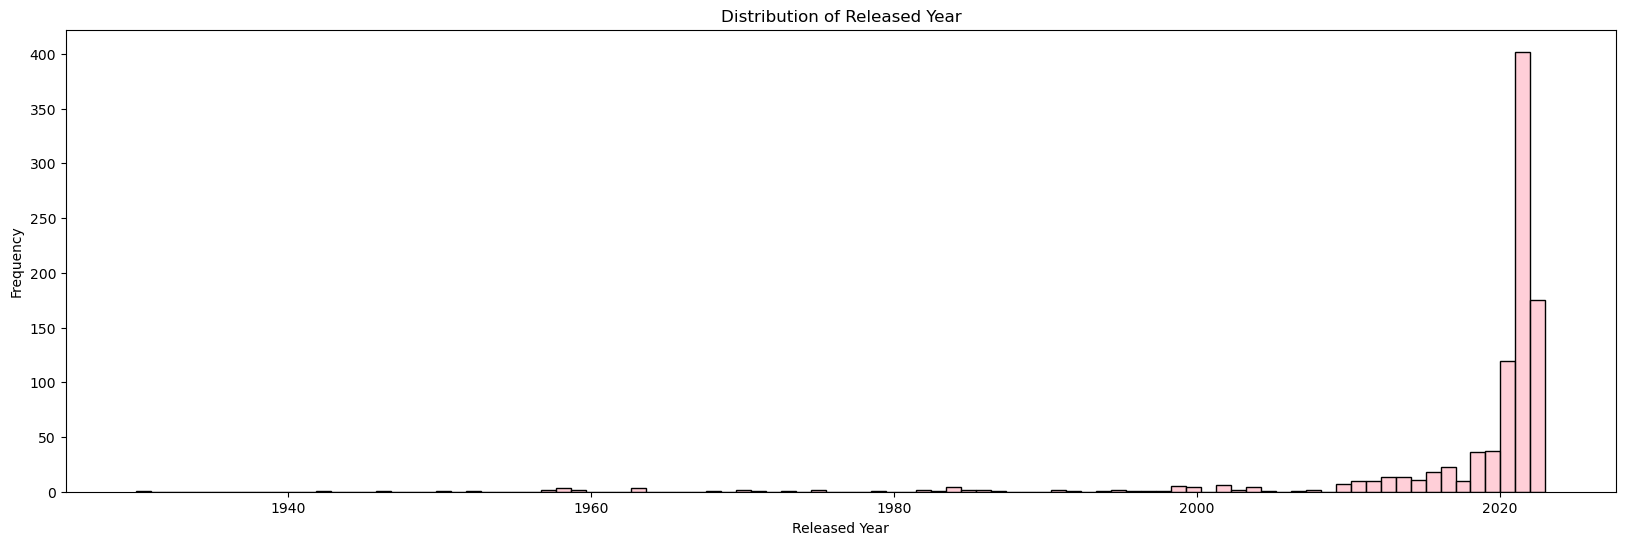

In [129]:
#distribution graph for "released year" column
plt.figure(figsize=(20, 6))
sns.histplot(df_spoti['released_year'], bins=94, color='pink')
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.show()

In [130]:
#basic outliers using basic stats for released year 
print(df_spoti['released_year'].describe())

count     953.000000
mean     2018.238195
std        11.116218
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64


In [131]:
#check outliers for said column
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outliers = column[(column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))]
    
    #display outliers in list form
    if not outliers.empty:
        return f"Outliers detected in {column.name}: {', '.join(map(str, outliers.unique()))}"
    else:
        return f"No outliers detected in {column.name}."

#output
released_year_outliers = find_outliers(df_spoti['released_year'])
print(released_year_outliers)

Outliers detected in released_year: 2013, 2014, 2016, 2012, 1999, 2008, 1975, 2015, 2011, 2004, 1985, 2007, 2002, 2010, 1983, 1992, 1968, 1984, 2000, 1997, 1995, 2003, 1973, 1930, 1994, 1958, 1957, 1963, 1959, 1970, 1971, 1952, 1946, 1979, 1950, 1942, 1986, 2005, 1991, 1996, 1998, 1982, 1987


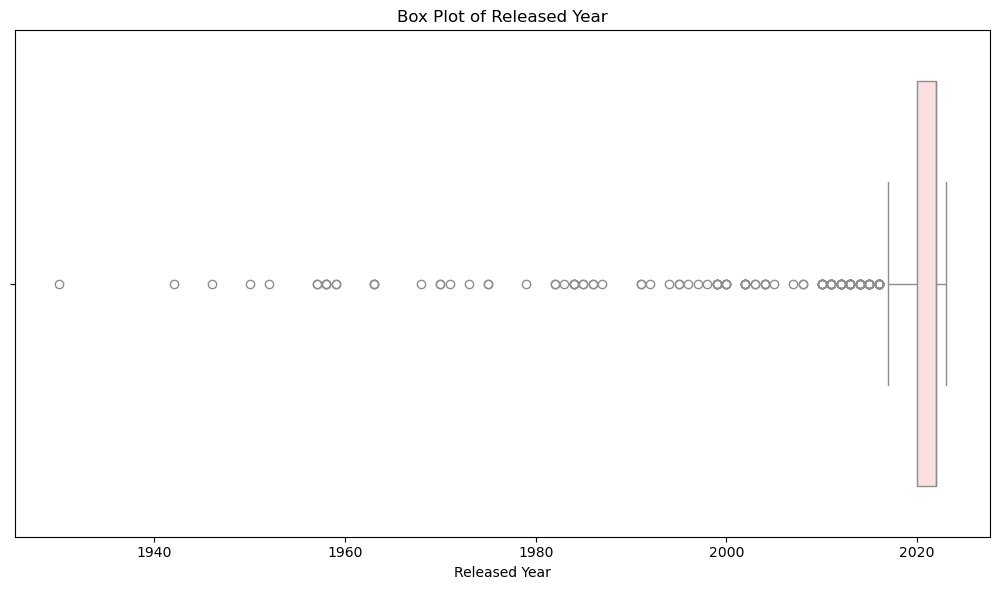

In [61]:
#graph a box plot for released year outlier
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(data=df_spoti, x='released_year', color='#FFDBE0')
plt.title('Box Plot of Released Year')
plt.xlabel('Released Year')

plt.tight_layout() 
plt.show()

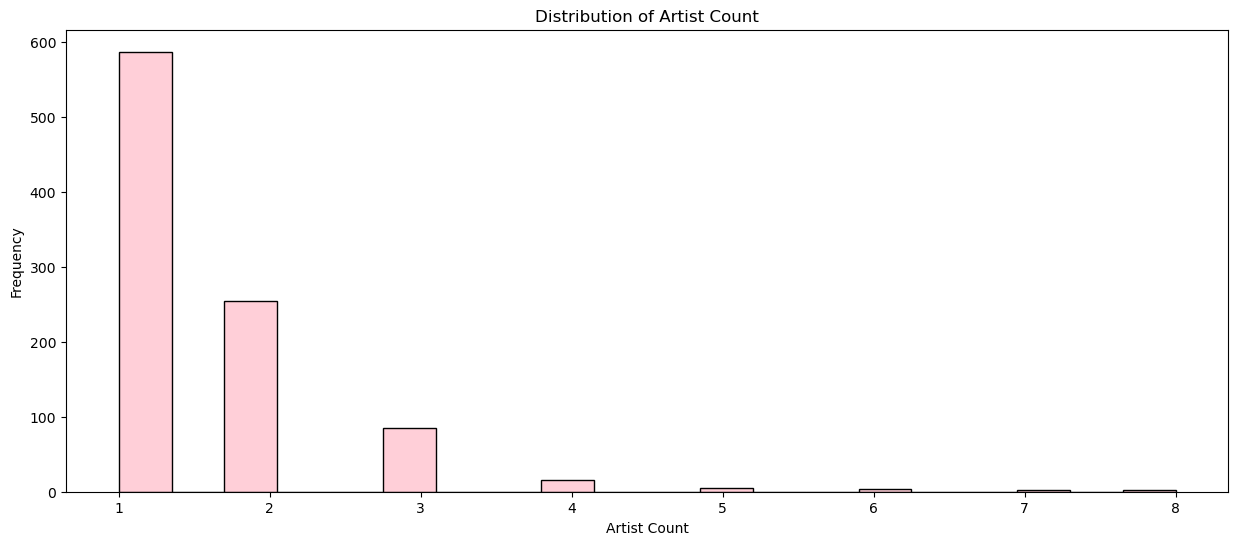

In [5]:
#distribution graph for "artist_count" column
plt.figure(figsize=(15, 6))
sns.histplot(df_spoti['artist_count'], bins=20, color='pink')
plt.title('Distribution of Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Frequency')
plt.show()

In [133]:
#basic outliers using basic stats for artist count
print(df_spoti['artist_count'].describe())

count    953.000000
mean       1.556139
std        0.893044
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64


In [63]:
#detect in-depth outliers for artist_count column
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outliers = column[(column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))]
    
    #display outliers in list form
    if not outliers.empty:
        return f"Outliers detected in {column.name}: {', '.join(map(str, outliers.unique()))}"
    else:
        return f"No outliers detected in {column.name}."

#output
released_year_outliers = find_outliers(df_spoti['artist_count'])
print(released_year_outliers)

Outliers detected in artist_count: 8, 4, 5, 6, 7


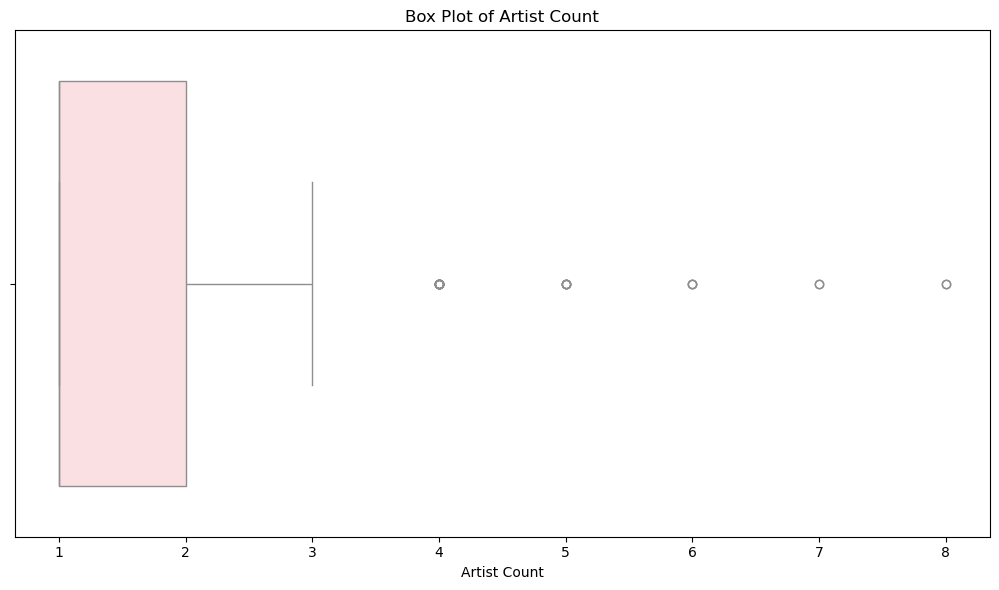

In [64]:
#box plot for "artist_count" column
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.boxplot(data=df_spoti, x='artist_count', color='#FFDBE0')
plt.title('Box Plot of Artist Count')
plt.xlabel('Artist Count')

plt.tight_layout()
plt.show()

### TOP PERFROMERS

#### Top 5 Tracks with Highest Streams

In [134]:
#top 5 tracks with highest number streams
toptracks = df_spoti[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(5)

#display result
print("Top 5 Most Streamed Tracks:")
print(toptracks)

Top 5 Most Streamed Tracks:
                                        track_name       streams
55                                 Blinding Lights  3.703895e+09
179                                   Shape of You  3.562544e+09
86                               Someone You Loved  2.887242e+09
620                                   Dance Monkey  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09


#### Top 5 Artists

In [138]:
#identify artists and arrange artist(s)_name column to corresponding row
artists=df_spoti['artist(s)_name'].str.split(',').explode().str.strip()

#display top 5 artists from the dataset
topartists=artists.value_counts().nlargest(5)
print("Top 5 Most Streamed Artists:")
print(topartists)

Top 5 Most Streamed Artists:
artist(s)_name
Bad Bunny         40
Taylor Swift      38
The Weeknd        37
SZA               23
Kendrick Lamar    23
Name: count, dtype: int64


### TEMPORAL TRENDS

#### Number of tracks released per year

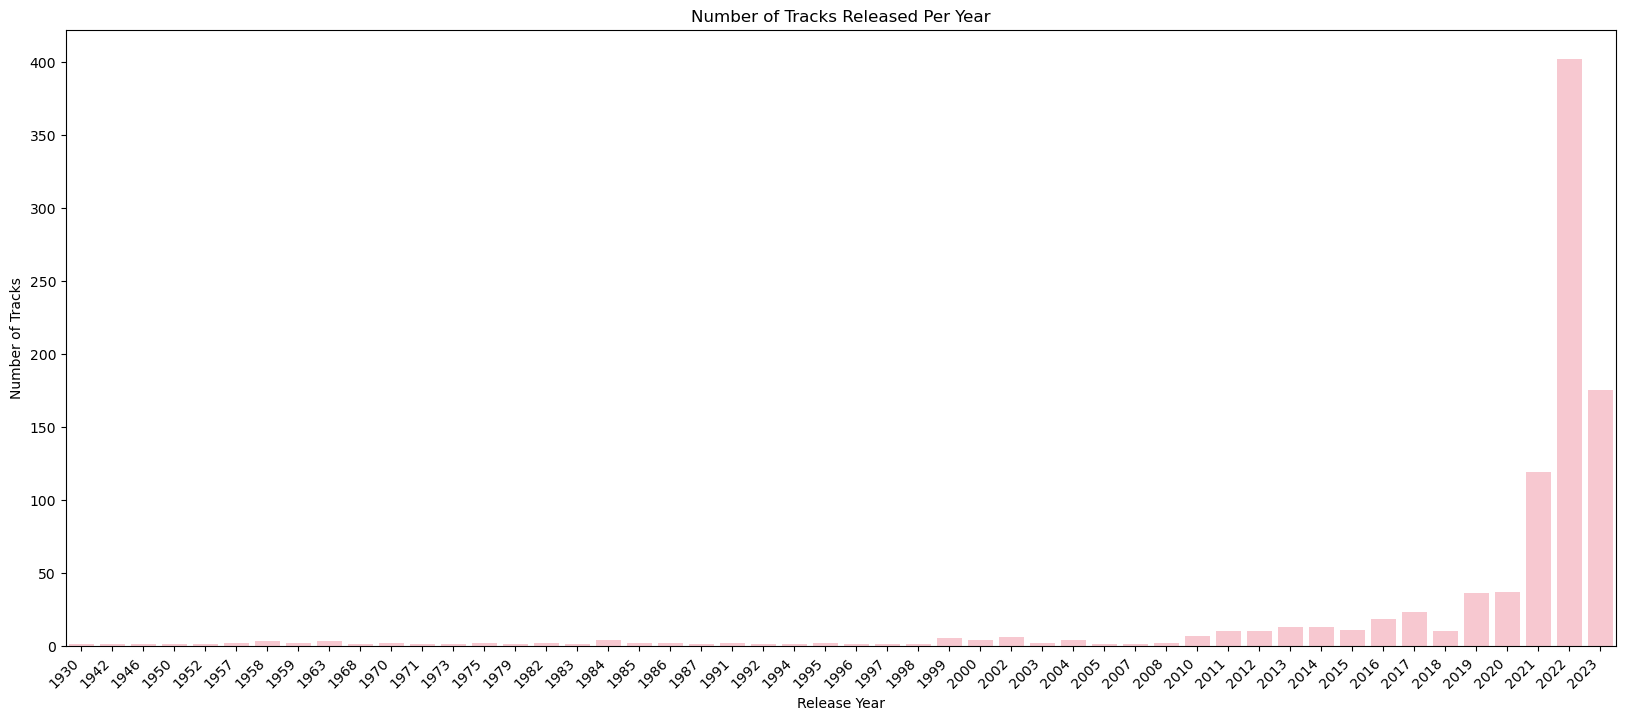

In [68]:
releasesyearly = df_spoti['released_year'].value_counts().sort_index()

#graph and plot the trends
plt.figure(figsize=(20, 8))
sns.barplot(x=releasesyearly.index, y=releasesyearly.values, color='pink')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Patterns for number of tracks per month

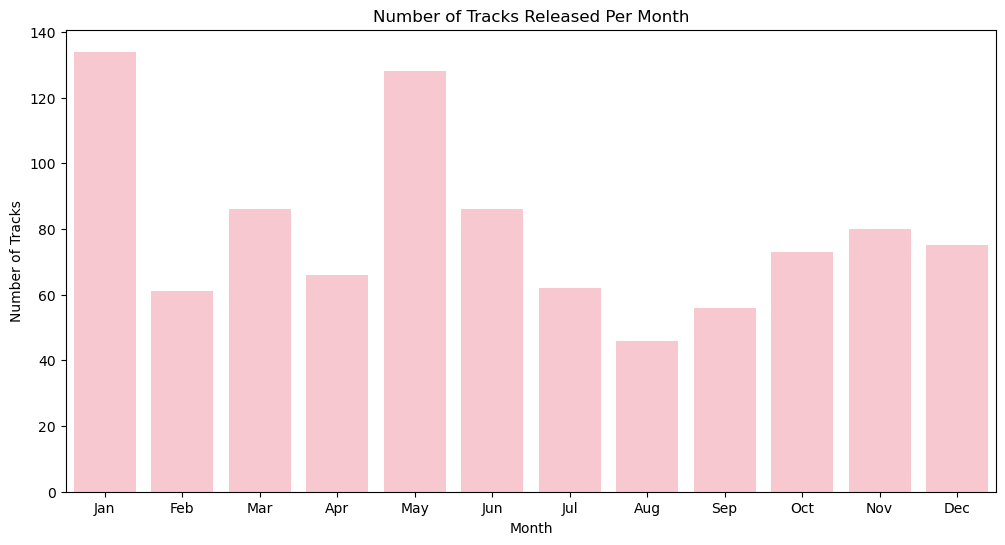

In [11]:
releases_per_month = df_spoti['released_month'].value_counts().sort_index()

#graph and plot the number of releases per month
plt.figure(figsize=(12, 6))
sns.barplot(x=releases_per_month.index, y=releases_per_month.values, color='pink')
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [13]:
#identify month with highest releases
mostreleases_month = releases_per_month.idxmax()
mostreleases_count = releases_per_month[most_releases_month]

#convert month number to name 
month_name = calendar.month_name[most_releases_month]

#display month with highest track releases
print(f"\n{most_releases_month_name} had the highest number of releases with {most_releases_count} tracks.\n")


January had the highest number of releases with 134 tracks.



### GENRE AND MUSIC CHARACTERISTICS

#### Correlation of Streams and Musical Attributes 

In [18]:
#obtain correlations between streams and the given musical attributrs
correlationstreams = df_spoti[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()['streams'].drop('streams')

print("Correlation of Streams with Musical Attributes: \n")
print(correlationstreams)

Correlation of Streams with Musical Attributes: 

bpm              -0.002252
danceability_%   -0.105002
energy_%         -0.026166
Name: streams, dtype: float64


##### - Correlation between danceability_% and energy_%.
##### - Correlation between valence_% and acousticness_%.

In [79]:
#get correlation between danceability_% and energy_%
danceabilityenergy=df_spoti['danceability_%'].corr(df_spoti['energy_%'])
print(f"Correlation between Danceability % and Energy %: {danceabilityenergy:.2f}")

#get correlation between valence_% and acousticness_%
valenceacousticness=df_spoti['valence_%'].corr(df_spoti['acousticness_%'])
print(f"Correlation between Valence % and Acousticness %: {valenceacousticness:.2f}")

Correlation between Danceability % and Energy %: 0.20
Correlation between Valence % and Acousticness %: -0.08


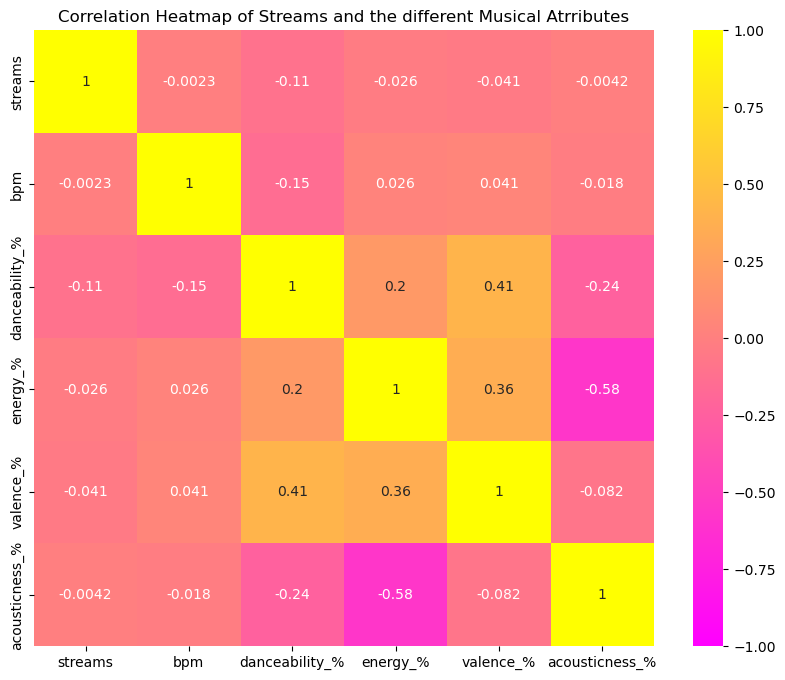

In [24]:
#graph the correlation for the attributes
attributes = df_spoti[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']]
correlation_matrix = attributes.corr()

#create and plot using heatmap to observe the correlations 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='spring', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Streams and the different Musical Atrributes")
plt.show()

### PLATFORM POPULARITY

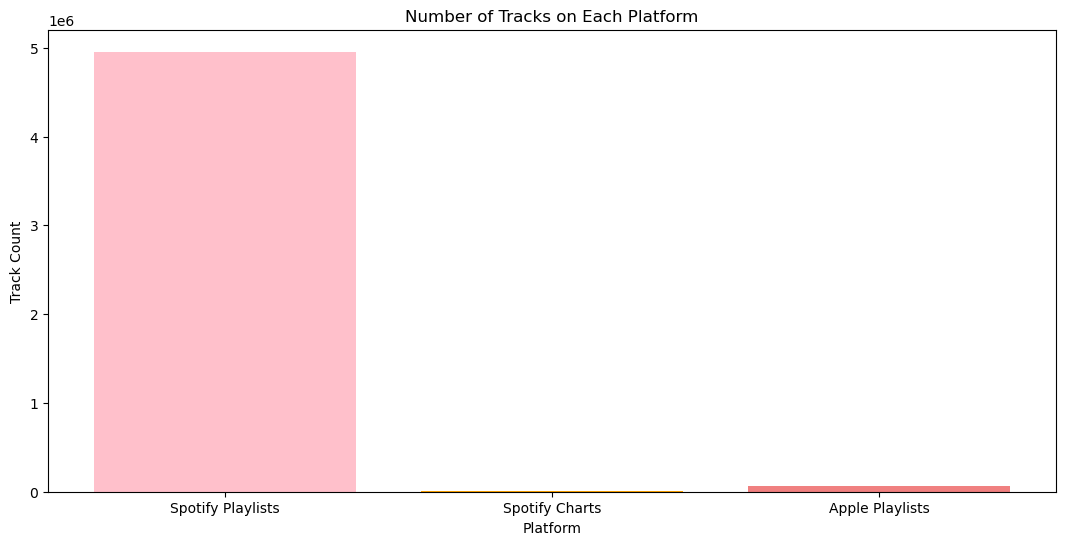

In [47]:
#get the number of tracks from each platform
platformcount = {
    'Spotify Playlists': df_spoti['in_spotify_playlists'].sum(),
    'Spotify Charts': df_spoti['in_spotify_charts'].sum(),
    'Apple Playlists': df_spoti['in_apple_playlists'].sum()
}

#convert into dataframe for easier plotting
platformcount_df = pd.DataFrame(list(platformcount.items()), columns=['Platform', 'Track Count'])

#plot values using bar graph
plt.figure(figsize=(13, 6))  # Increase the figure size
bars = plt.bar(platformcount_df['Platform'], platformcount_df['Track Count'], color=['pink', 'orange', 'lightcoral'])
plt.title('Number of Tracks on Each Platform')
plt.xlabel('Platform')
plt.ylabel('Track Count')
plt.show()

In [48]:
#platform with the most popular tracks
most_popular_plat = max(platformcount, key=platformcount.get)
print(f"\nThe platform favoring the most popular tracks is {most_popular_plat} with {platformcount[most_popular_plat]} tracks.\n")


The platform favoring the most popular tracks is Spotify Playlists with 4955719 tracks.



### ADVANCED ANALYSIS

#### Pattern between Tracks and its distribution between Key and Mode

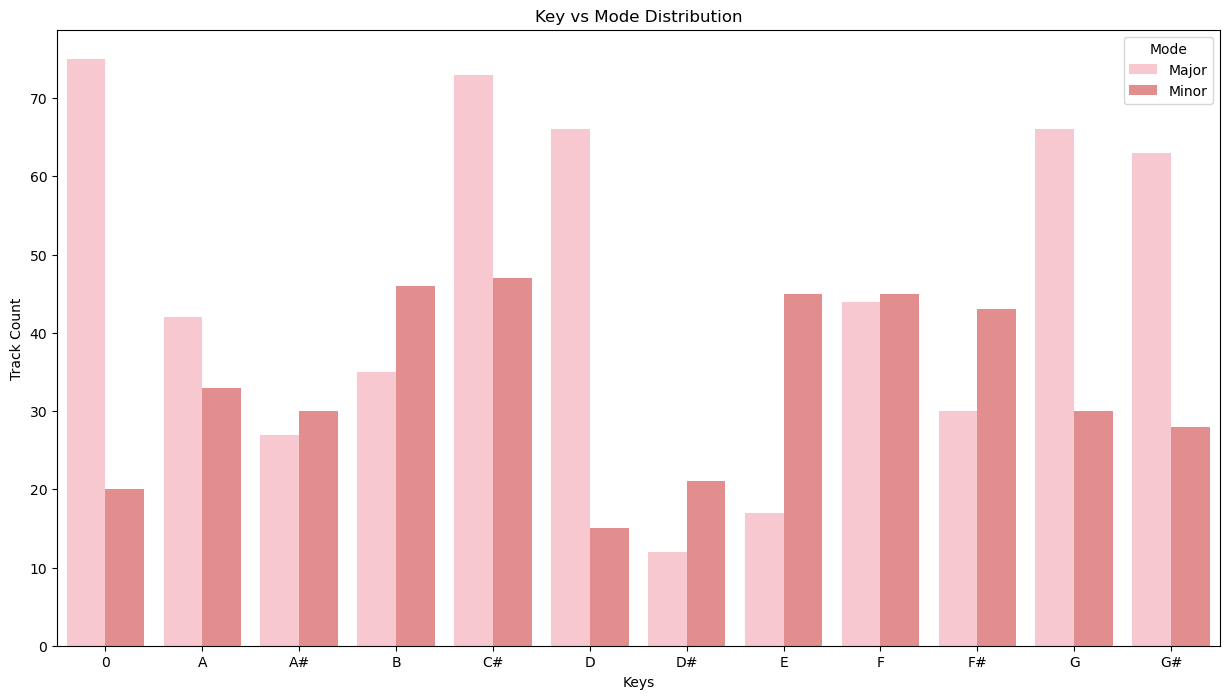

In [45]:
#calulate tracks for key and mode
keymode=df_spoti.groupby(['key', 'mode']).size().reset_index(name='Count')

#create bar graph to differentiate the two modes (minor and major)
plt.figure(figsize=(15, 8))
sns.barplot(data=keymode,x='key',y='Count',hue='mode',palette=['pink', 'lightcoral'])
plt.title('Key vs Mode Distribution')
plt.xlabel('Keys')
plt.ylabel('Track Count')
plt.legend(title='Mode')

#output the graph
plt.show()

#### Compare how often different Artists appear on different Playlists and Charts

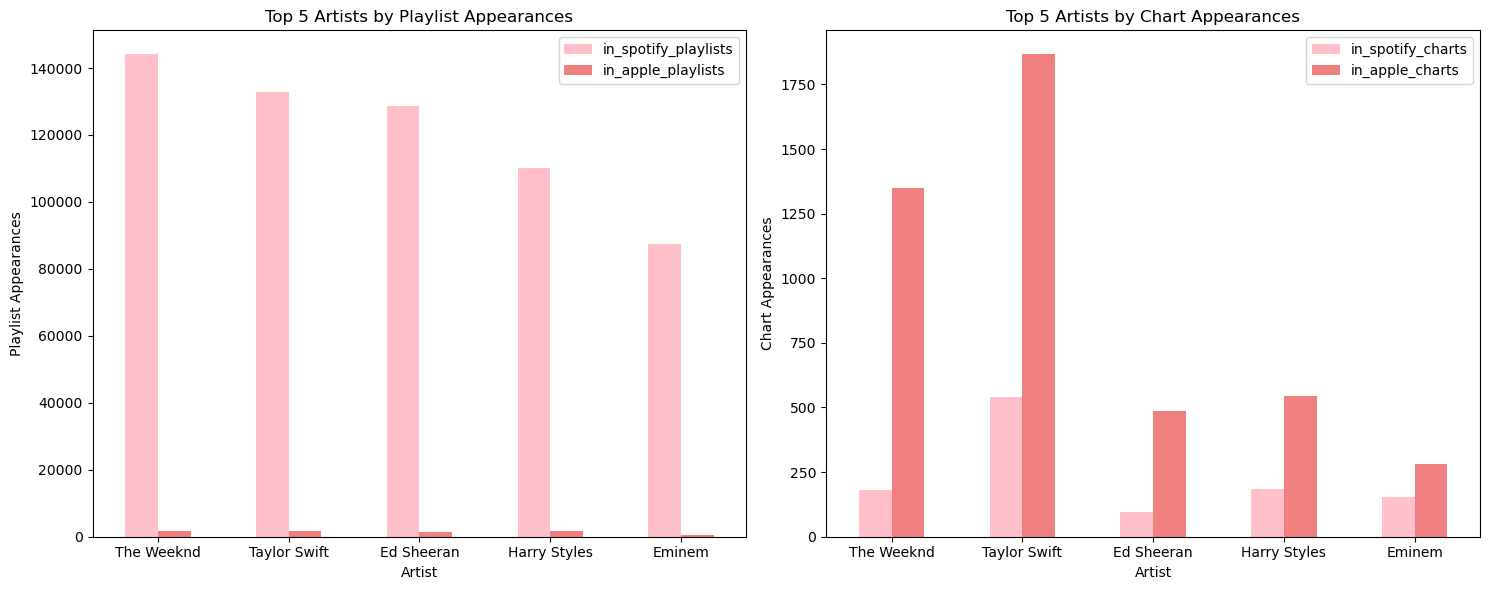

In [4]:
artistplaylist_charts = df_spoti.groupby('artist(s)_name')[
    ['in_spotify_playlists', 'in_apple_playlists', 'in_spotify_charts', 'in_apple_charts']].sum().sort_values(by='in_spotify_playlists', ascending=False)

#get top 5 artists with highest playlist and chart apeearances
artists_playlist = artistplaylist_charts[['in_spotify_playlists', 'in_apple_playlists']].head(5)
artists_chart = artistplaylist_charts[['in_spotify_charts', 'in_apple_charts']].head(5)

#bar charts to be displayed beside each other 
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#graph for apple and spotify playlist appearances
artists_playlist.plot(kind='bar', color=['pink', 'lightcoral'], ax=axes[0])
axes[0].set_title('Top 5 Artists by Playlist Appearances')
axes[0].set_xlabel('Artist')
axes[0].set_ylabel('Playlist Appearances')
axes[0].tick_params(axis='x', rotation=0)

#graph for apple and spotify chart appearances
artists_chart.plot(kind='bar', color=['pink', 'lightcoral'], ax=axes[1])
axes[1].set_title('Top 5 Artists by Chart Appearances')
axes[1].set_xlabel('Artist')
axes[1].set_ylabel('Chart Appearances')
axes[1].tick_params(axis='x', rotation=0)

#display the two graphs
plt.tight_layout()
plt.show()